<a href="https://colab.research.google.com/github/lillanieder/data-projects/blob/main/6_google_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lazarinastoy.com/the-ultimate-guide-to-pytrends-google-trends-api-with-python/

In [1]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from pytrends.request import TrendReq

# Get today's treniding topics

In [3]:
pytrend = TrendReq()

trendingtoday = pytrend.today_searches(pn='HU')
trendingtoday.head(20)

0          /trends/explore?q=Diana&date=now+7-d&geo=HU
1    /trends/explore?q=Azpilicueta&date=now+7-d&geo=HU
2    /trends/explore?q=Jimmy+Carter&date=now+7-d&ge...
3     /trends/explore?q=Ray+Liotta&date=now+7-d&geo=HU
Name: exploreLink, dtype: object

# Get Google Top Charts

In [4]:
df = pytrend.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,


# Interest Over Time

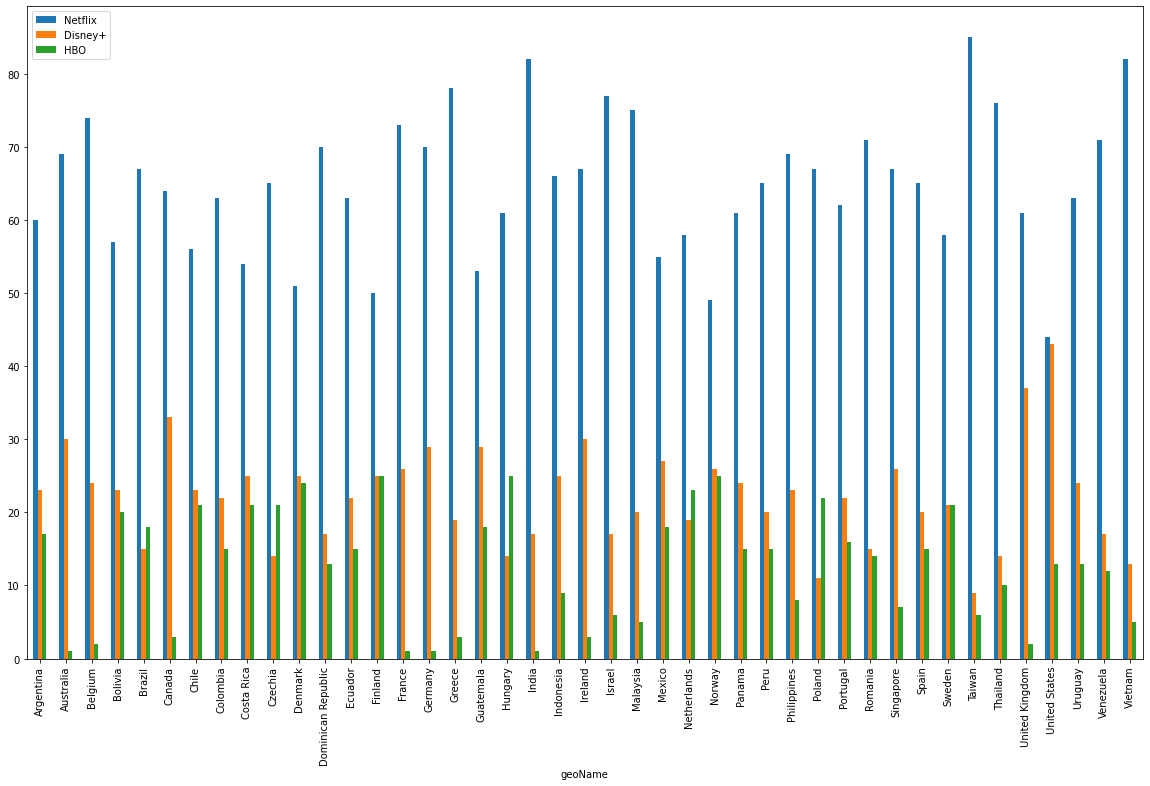

In [5]:
#provide your search terms
kw_list=['Netflix', 'Disney+', 'HBO']

#search interest per region
#run model for keywords (can also be competitors)
pytrend.build_payload(kw_list, timeframe='today 1-m')

# Interest by Region
regiondf = pytrend.interest_by_region()
#looking at rows where all values are not equal to 0
regiondf = regiondf[(regiondf != 0).all(1)]

#drop all rows that have null values in all columns
regiondf.dropna(how='all',axis=0, inplace=True)

#visualise
regiondf.plot(figsize=(20, 12), y=kw_list, kind ='bar')